# Global Terrorism exploration and  success prediction APP

## Dataset

The Global Terrorism Database (GTD) documents more than 200,000 international and domestic terrorist attacks that occurred worldwide since 1970. With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation. Data collection is ongoing and updates are published annually at www.start.umd.edu/gtd.


## Project Goals

The goal of the project is to understand more about the global terrorism, using an exploration app in streamlit that allow to understand better the terrorism in each country: terrorist groups, attacks, more dangerous cities, most frequent acts of terror, main targets. Also in the exploration app, we will be able to know if the country is in a trend according to the region (Regional Problem) or in contrary, if the country has a local problem, out of the behaivour of its region.

Having a good approach of the country situation with regards to terrorist activity, we will include the feature to predict if a terrorist attack would be successfull or not, using a machine learning clasification algorithm that would be trained using all the relevant historical data that we have in our dataset.


## Importing Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing data

In [2]:
df = pd.read_excel("globalterrorismdb_0221dist.xlsx")

In [3]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            189429
extended                   0
resolution            196515
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                  0
city                     426
latitude                4627
longitude               4628
specificity                1
vicinity                   0
location              137414
summary                66121
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           168064
alternative_txt       168064
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           193485
attacktype2_txt       193485
attacktype3           200613
attacktype3_txt       200613
targtype1     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 207.2+ MB


In [5]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Na

## Data Cleaning

We will clean the dataset and choose the variables that have a big amount of data not null, and the ones that will be usefull for our report.

In [6]:
df = df[['iyear','imonth','iday','country_txt','country','region_txt',
         'region','provstate','city',
         'latitude', 'longitude','suicide', 'attacktype1_txt',
         'attacktype1', 'targtype1_txt', 'targtype1',
         'gname', 'weaptype1_txt','weaptype1',
         'nkill','nwound','success','eventid','natlty1',"natlty1_txt","extended","specificity","vicinity","crit1"]]

In [7]:
df.head()

,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,National,Santo Domingo,18.456792,-69.951164,0,Assassination,1,Private Citizens & Property,14,MANO-D,Unknown,13,1.0,0.0,1,197000000001,58.0,Dominican Republic,0,1.0,0,1
1,1970,0,0,Mexico,130,North America,1,Federal,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,23rd of September Communist League,Unknown,13,0.0,0.0,1,197000000002,21.0,Belgium,0,1.0,0,1
2,1970,1,0,Philippines,160,Southeast Asia,5,Tarlac,Unknown,15.478598,120.599741,0,Assassination,1,Journalists & Media,10,Unknown,Unknown,13,1.0,0.0,1,197001000001,217.0,United States,0,4.0,0,1
3,1970,1,0,Greece,78,Western Europe,8,Attica,Athens,37.997490,23.762728,0,Bombing/Explosion,3,Government (Diplomatic),7,Unknown,Explosives,6,NaN,NaN,1,197001000002,217.0,United States,0,1.0,0,1
4,1970,1,0,Japan,101,East Asia,4,Fukouka,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,7,Government (Diplomatic),7,Unknown,Incendiary,8,NaN,NaN,1,197001000003,217.0,United States,0,1.0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            201183 non-null  int64  
 1   imonth           201183 non-null  int64  
 2   iday             201183 non-null  int64  
 3   country_txt      201183 non-null  object 
 4   country          201183 non-null  int64  
 5   region_txt       201183 non-null  object 
 6   region           201183 non-null  int64  
 7   provstate        201183 non-null  object 
 8   city             200757 non-null  object 
 9   latitude         196556 non-null  float64
 10  longitude        196555 non-null  float64
 11  suicide          201183 non-null  int64  
 12  attacktype1_txt  201183 non-null  object 
 13  attacktype1      201183 non-null  int64  
 14  targtype1_txt    201183 non-null  object 
 15  targtype1        201183 non-null  int64  
 16  gname            201183 non-null  obje

In [9]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
country                0
region_txt             0
region                 0
provstate              0
city                 426
latitude            4627
longitude           4628
suicide                0
attacktype1_txt        0
attacktype1            0
targtype1_txt          0
targtype1              0
gname                  0
weaptype1_txt          0
weaptype1              0
nkill              11950
nwound             18924
success                0
eventid                0
natlty1             1850
natlty1_txt         1850
extended               0
specificity            1
vicinity               0
crit1                  0
dtype: int64

In [10]:
df['iday'].value_counts()
df['iday'].replace(to_replace=0, value=np.random.randint(1, 29), inplace=True)
df['iday'].value_counts()

8     7362
15    7168
1     6972
4     6816
16    6735
9     6734
10    6727
28    6705
12    6693
14    6674
13    6667
7     6666
11    6637
3     6617
20    6616
27    6591
19    6580
2     6568
25    6563
5     6544
17    6512
18    6502
21    6439
22    6422
26    6404
23    6391
6     6366
24    6365
29    6059
30    5648
31    3440
Name: iday, dtype: int64

In [11]:
df['imonth'].value_counts()
df['imonth'].replace(to_replace=0, value=np.random.randint(1, 13), inplace=True)
df['imonth'].value_counts()

5     18898
7     18038
8     17293
10    17167
6     17070
3     16926
4     16836
1     16654
11    16257
9     15681
2     15425
12    14938
Name: imonth, dtype: int64

In [12]:
df2 = df[["iyear", "imonth", "iday"]].copy()
df2.columns = ["year", "month", "day"]
pd.to_datetime(df2)
df["idate"] = pd.to_datetime(df2)
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1
0,1970-07-02,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,National,Santo Domingo,18.456792,-69.951164,0,Assassination,1,Private Citizens & Property,14,MANO-D,Unknown,13,1.0,0.0,1,197000000001,58.0,Dominican Republic,0,1.0,0,1
1,1970-03-08,1970,3,8,Mexico,130,North America,1,Federal,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),6,Government (Diplomatic),7,23rd of September Communist League,Unknown,13,0.0,0.0,1,197000000002,21.0,Belgium,0,1.0,0,1
2,1970-01-08,1970,1,8,Philippines,160,Southeast Asia,5,Tarlac,Unknown,15.478598,120.599741,0,Assassination,1,Journalists & Media,10,Unknown,Unknown,13,1.0,0.0,1,197001000001,217.0,United States,0,4.0,0,1
3,1970-01-08,1970,1,8,Greece,78,Western Europe,8,Attica,Athens,37.997490,23.762728,0,Bombing/Explosion,3,Government (Diplomatic),7,Unknown,Explosives,6,NaN,NaN,1,197001000002,217.0,United States,0,1.0,0,1
4,1970-01-08,1970,1,8,Japan,101,East Asia,4,Fukouka,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,7,Government (Diplomatic),7,Unknown,Incendiary,8,NaN,NaN,1,197001000003,217.0,United States,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,2019-12-31,2019,12,31,Iraq,95,Middle East & North Africa,10,Baghdad,Baghdad,33.303567,44.371771,0,Bombing/Explosion,3,Private Citizens & Property,14,Unknown,Explosives,6,0.0,0.0,1,201912310028,95.0,Iraq,0,1.0,0,1
201179,2019-12-31,2019,12,31,Sudan,195,Sub-Saharan Africa,11,West Darfur,El Geneina,13.440886,22.441728,0,Unknown,9,Police,3,Unknown,Unknown,13,2.0,1.0,1,201912310030,195.0,Sudan,0,1.0,0,1
201180,2019-12-31,2019,12,31,Sudan,195,Sub-Saharan Africa,11,West Darfur,El Geneina,13.440886,22.441728,0,Armed Assault,2,Government (General),2,Unknown,Firearms,5,2.0,0.0,1,201912310031,195.0,Sudan,0,1.0,0,1
201181,2019-12-31,2019,12,31,India,92,South Asia,6,Jammu and Kashmir,Bagiot Dora,33.812790,74.097730,0,Bombing/Explosion,3,Private Citizens & Property,14,Unknown,Explosives,6,0.0,1.0,1,201912310032,92.0,India,0,1.0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            201183 non-null  datetime64[ns]
 1   iyear            201183 non-null  int64         
 2   imonth           201183 non-null  int64         
 3   iday             201183 non-null  int64         
 4   country_txt      201183 non-null  object        
 5   country          201183 non-null  int64         
 6   region_txt       201183 non-null  object        
 7   region           201183 non-null  int64         
 8   provstate        201183 non-null  object        
 9   city             200757 non-null  object        
 10  latitude         196556 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          201183 non-null  int64         
 13  attacktype1_txt  201183 non-null  object        
 14  attacktype1      201

In [14]:
## As we see there are missing values in columns nkill nwound, as the amount of
## missing values are more than 8%, we could not proceed removing those rows with mising values in both columns 
## so we will substitute those values with a average data so we will not affect to our training data

df['nkill'].fillna((df['nkill'].mean()), inplace=True)
df['nwound'].fillna((df['nwound'].mean()), inplace=True)

In [15]:
df["nkill"] = df["nkill"].astype(int)
df["nwound"] = df["nwound"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            201183 non-null  datetime64[ns]
 1   iyear            201183 non-null  int64         
 2   imonth           201183 non-null  int64         
 3   iday             201183 non-null  int64         
 4   country_txt      201183 non-null  object        
 5   country          201183 non-null  int64         
 6   region_txt       201183 non-null  object        
 7   region           201183 non-null  int64         
 8   provstate        201183 non-null  object        
 9   city             200757 non-null  object        
 10  latitude         196556 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          201183 non-null  int64         
 13  attacktype1_txt  201183 non-null  object        
 14  attacktype1      201

In [16]:
df.to_csv("Terrorism_preprocessed.csv",index=False)

In [17]:
#With regards to the rows with no information in latitude and longitud, there are 4557 rows over 181691, this means a 2.5% or our data set.
#from those rows 2295 the city or provstate is unknown, 
df = df.dropna(subset=['longitude'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196555 entries, 0 to 201182
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   idate            196555 non-null  datetime64[ns]
 1   iyear            196555 non-null  int64         
 2   imonth           196555 non-null  int64         
 3   iday             196555 non-null  int64         
 4   country_txt      196555 non-null  object        
 5   country          196555 non-null  int64         
 6   region_txt       196555 non-null  object        
 7   region           196555 non-null  int64         
 8   provstate        196555 non-null  object        
 9   city             196136 non-null  object        
 10  latitude         196555 non-null  float64       
 11  longitude        196555 non-null  float64       
 12  suicide          196555 non-null  int64         
 13  attacktype1_txt  196555 non-null  object        
 14  attacktype1      196

In [18]:
df2 = df[df["provstate"].isnull()]
df2[df2["city"].isnull()]

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1


In [19]:
df3 = df[df["city"].isnull()]
df3[df3["provstate"].isnull()]

,idate,iyear,imonth,iday,country_txt,country,region_txt,region,provstate,city,latitude,longitude,suicide,attacktype1_txt,attacktype1,targtype1_txt,targtype1,gname,weaptype1_txt,weaptype1,nkill,nwound,success,eventid,natlty1,natlty1_txt,extended,specificity,vicinity,crit1


In [20]:
##THIS MEANS THAT when the city is non value the provstate has value and the contrary also happens, so no cleaning is need it

In [21]:
df.to_csv("Terrorism_clean_dataset.csv",index=False)

## Exploring data

### Visualization of outliers 

An outlier is a data point that lies outside the overall pattern in a distribution. A commonly used rule says that a data point is an outlier if it is more than 1.5 IQR above the third quartile or below the first quartile. Said differently, low outliers are below Q1 -1.5 * IQR  and high outliers are above Q3 +1.5 IQR


<AxesSubplot:>

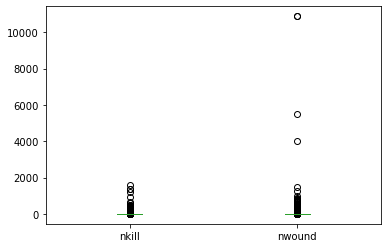

In [22]:
df[['nkill', 'nwound']].plot.box()

In [23]:
# Looking for outliers
df[['nkill', 'nwound']].describe()

,nkill,nwound
count,196555.000000,196555.000000
mean,2.352156,3.136674
std,10.857536,40.164057
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,3.000000
max,1570.000000,10878.000000


In [24]:
#Function to show outliers using the 1.5 IQR method 
#IQR = Q3 - Q1
    # lower outliers are below  Q1 - 1.5 * IQR  
    # Higher ouliers  are above  Q3 + 1.5 * IQR 
    
a = np.array(df.nkill)
upper_quartile = np.percentile(a, 75)
lower_quartile = np.percentile(a, 25)
iqr15 = (upper_quartile - lower_quartile) * 1.5
quartile_set = (lower_quartile - iqr15, upper_quartile + iqr15)
quartile_set

(-3.0, 5.0)

## Trend analysis (Goal 1) (to-DO)

C:\Users\APC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

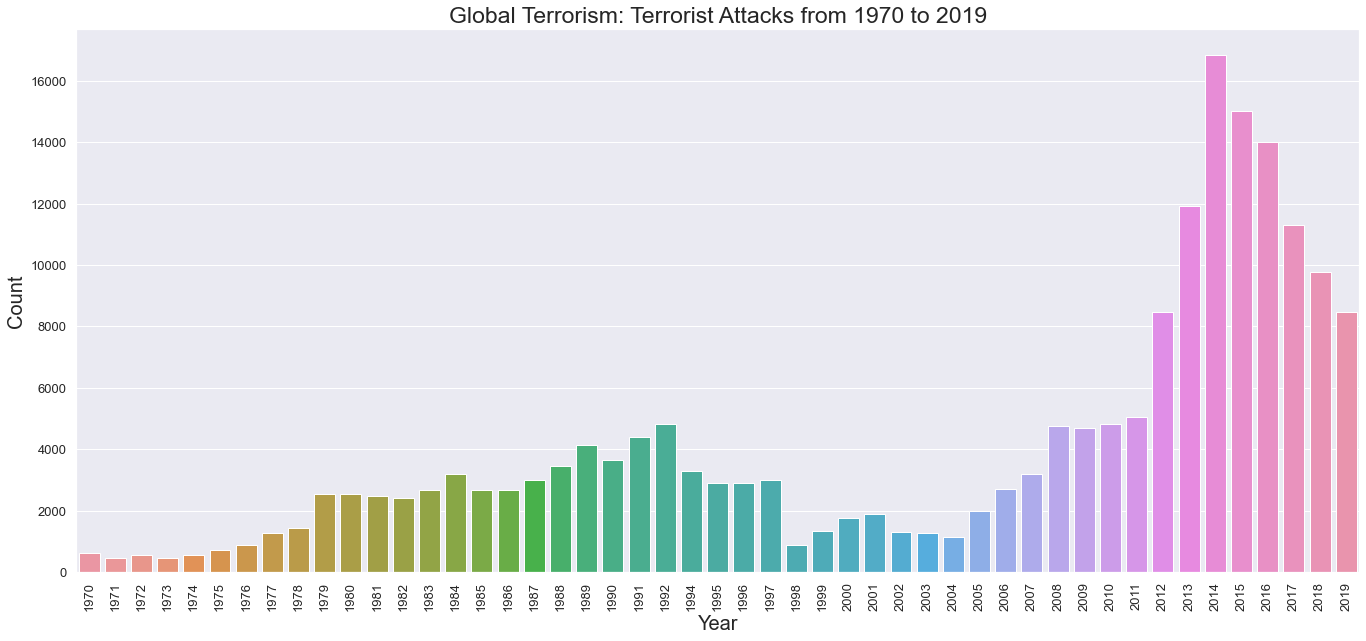

In [25]:
# Plot with the Terrorist Attacks from 1970 to 2016
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))
sns.countplot('iyear', data=df)
plt.title('Global Terrorism: Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Count', fontsize=20)

In [26]:
# Groupby number of people killed per year


# df_total_killed_year = df.groupby(['iyear'])['nkill'].sum().to_frame(name = 'Total_sum').reset_index()
df_total_killed_year = df.groupby('iyear').agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_year

,iyear,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,1970,218,643,0.339036,365,0.567652
1,1971,296,463,0.639309,511,1.103672
2,1972,626,551,1.136116,1387,2.517241
3,1973,462,465,0.993548,1176,2.529032
4,1974,649,577,1.124783,1543,2.674177
5,1975,911,727,1.253095,1619,2.226960
6,1976,849,900,0.943333,1593,1.770000
7,1977,688,1292,0.532508,1145,0.886223
8,1978,1666,1455,1.145017,2103,1.445361
9,1979,2575,2533,1.016581,3547,1.400316


Text(0, 0.5, 'Total people killed')

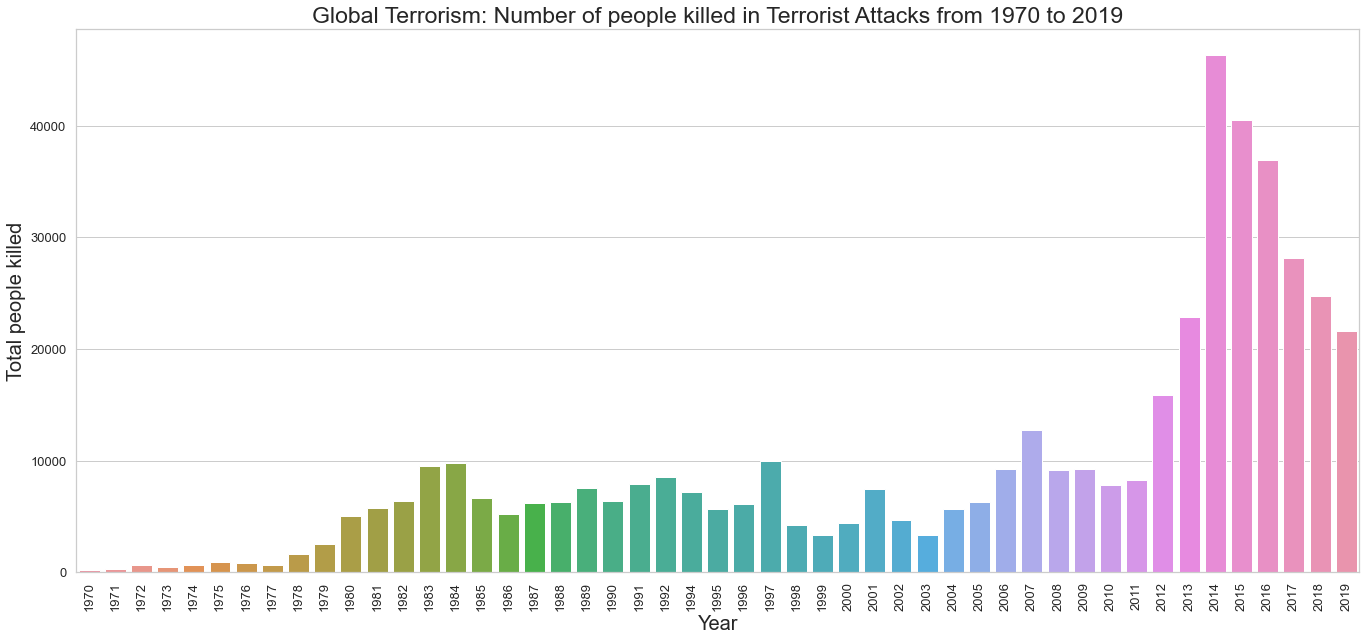

In [27]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="iyear", y="Total_killed", data=df_total_killed_year)
             
plt.title('Global Terrorism: Number of people killed in Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Total people killed', fontsize=20)


Text(0, 0.5, 'Total people wound')

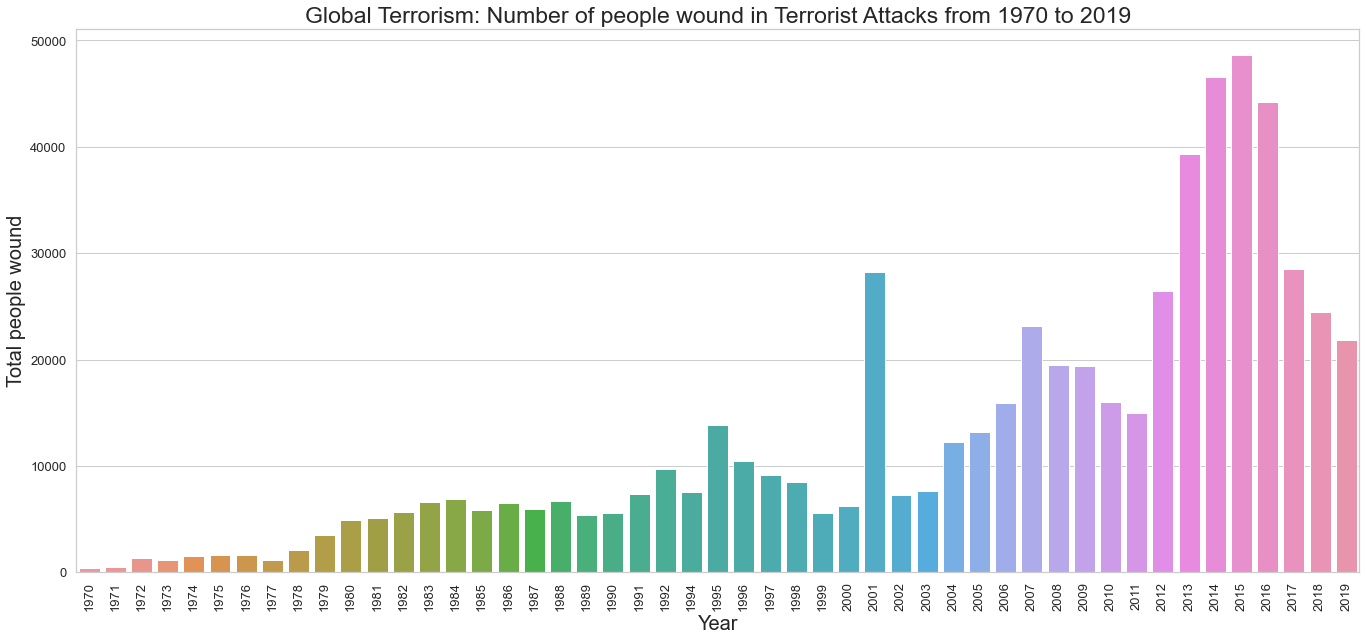

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(23, 10))

sns.set_theme(style="whitegrid")
ax2 = sns.barplot(x="iyear", y="Total_wound", data=df_total_killed_year)
             
plt.title('Global Terrorism: Number of people wound in Terrorist Attacks from 1970 to 2019', fontsize=23)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=20) 
plt.ylabel('Total people wound', fontsize=20)

## we can see that the number of terrorist attacks have increased since 2012,  and also de total amount of people killed.

The worst year was 2014, with 16794 terrorist attack and 46308 pepople killed. With regard to people wounded we see an outlier in 2001, due to the terrorst attack in US (11th September).

In [29]:
# Groupby number of people killed per year


# df_total_killed_year = df.groupby(['iyear'])['nkill'].sum().to_frame(name = 'Total_sum').reset_index()
df_total_killed_year_by_region = df.groupby(['iyear','region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_year_by_region

,iyear,region_txt,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,1970,Australasia & Oceania,0,1,0.000000,0,0.000000
1,1970,Central America & Caribbean,3,6,0.500000,0,0.000000
2,1970,East Asia,2,2,1.000000,3,1.500000
3,1970,Eastern Europe,18,12,1.500000,27,2.250000
4,1970,Middle East & North Africa,15,28,0.535714,23,0.821429
...,...,...,...,...,...,...,...
546,2019,South America,155,272,0.569853,323,1.187500
547,2019,South Asia,9437,3031,3.113494,10015,3.304190
548,2019,Southeast Asia,645,714,0.903361,907,1.270308
549,2019,Sub-Saharan Africa,7113,1933,3.679772,4516,2.336265


In [30]:
df_total_killed_by_region = df.groupby(['region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_by_region

,region_txt,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,Australasia & Oceania,214,299,0.715719,336,1.123746
1,Central America & Caribbean,28770,9374,3.069127,14749,1.573394
2,Central Asia,999,559,1.787120,1956,3.499106
3,East Asia,1221,817,1.494492,9363,11.460220
4,Eastern Europe,7755,5239,1.480244,12834,2.449704
5,Middle East & North Africa,149862,55486,2.700898,236989,4.271149
6,North America,5273,3692,1.428223,27550,7.462080
7,South America,29703,18700,1.588396,22267,1.190749
8,South Asia,122004,50797,2.401795,165700,3.262004
9,Southeast Asia,15512,13547,1.145051,27913,2.060456


Text(0, 0.5, 'Number of Attacks')

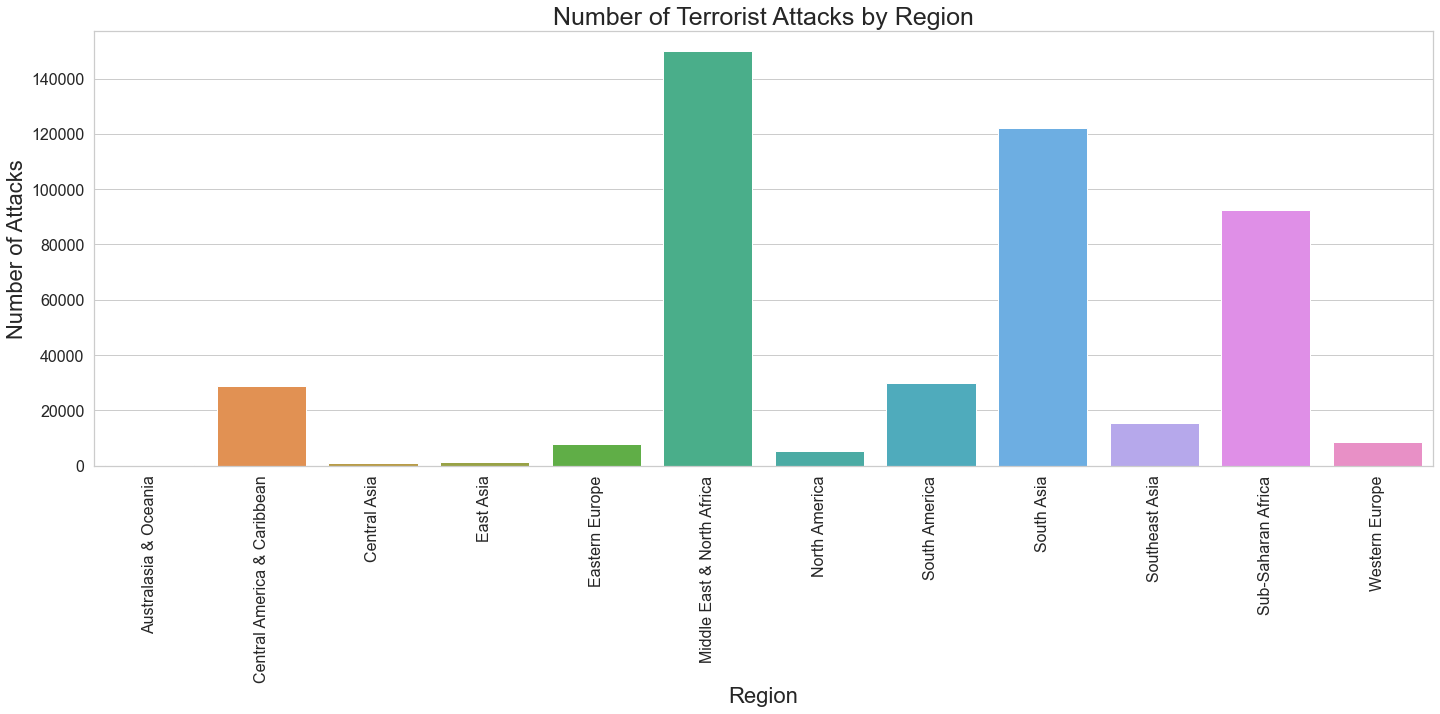

In [31]:
plt.figure(figsize=(24, 8))
sns.barplot(x="region_txt", y="Total_killed", data=df_total_killed_by_region)
plt.title('Number of Terrorist Attacks by Region', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Region', fontsize=22) 
plt.ylabel('Number of Attacks', fontsize=22)

Text(0.5, 1.0, 'Western Europe')

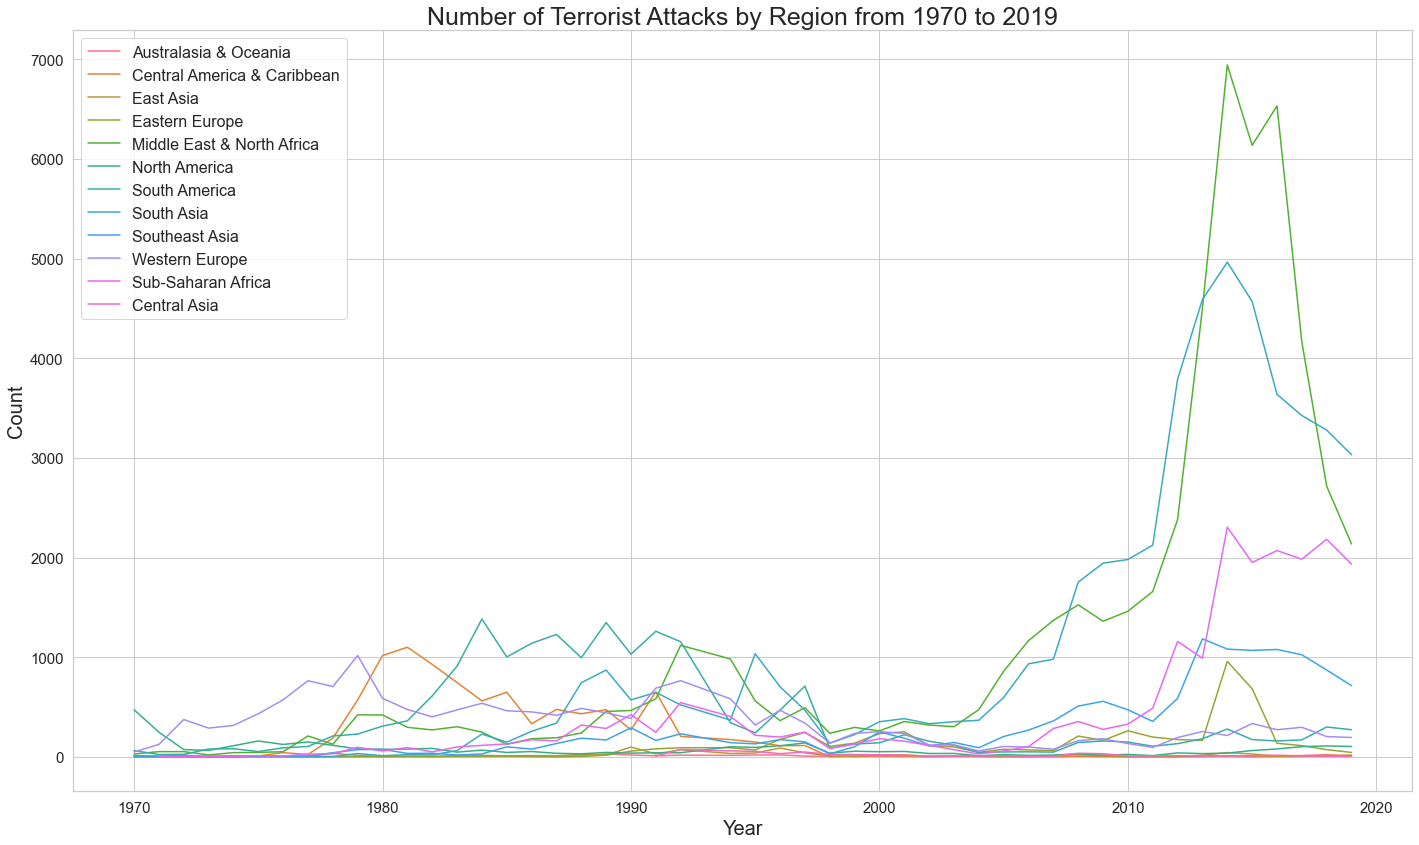

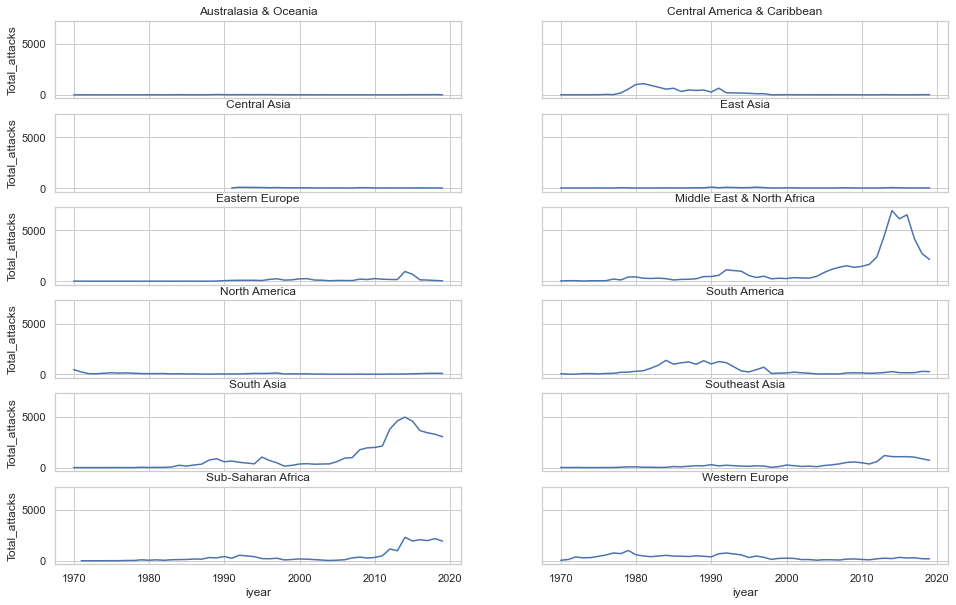

In [32]:
plt.figure(figsize=(24, 14))
sns.lineplot(data=df_total_killed_year_by_region, x='iyear', y='Total_attacks', hue='region_txt')

plt.title('Number of Terrorist Attacks by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)

f, axes =  plt.subplots(6, 2, figsize=(16, 10), sharex=True, sharey=True)

sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Australasia & Oceania'],  x='iyear', y='Total_attacks', ax=axes[0,0], legend=False).set_title('Australasia & Oceania')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central America & Caribbean'],  x='iyear', y='Total_attacks', ax=axes[0,1], legend=False).set_title('Central America & Caribbean')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Central Asia'],  x='iyear', y='Total_attacks', ax=axes[1,0], legend=False).set_title('Central Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='East Asia'],  x='iyear', y='Total_attacks', ax=axes[1,1], legend=False).set_title('East Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Eastern Europe'],  x='iyear', y='Total_attacks', ax=axes[2,0], legend=False).set_title('Eastern Europe')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Middle East & North Africa'],  x='iyear', y='Total_attacks', ax=axes[2,1], legend=False).set_title('Middle East & North Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='North America'],  x='iyear', y='Total_attacks', ax=axes[3,0], legend=False).set_title('North America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South America'],  x='iyear', y='Total_attacks', ax=axes[3,1], legend=False).set_title('South America')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='South Asia'],  x='iyear', y='Total_attacks', ax=axes[4,0], legend=False).set_title('South Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Southeast Asia'],  x='iyear', y='Total_attacks', ax=axes[4,1], legend=False).set_title('Southeast Asia')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Sub-Saharan Africa'],  x='iyear', y='Total_attacks', ax=axes[5,0], legend=False).set_title('Sub-Saharan Africa')
sns.lineplot(data=df_total_killed_year_by_region[df_total_killed_year_by_region.region_txt=='Western Europe'],  x='iyear', y='Total_attacks', ax=axes[5,1], legend=False).set_title('Western Europe')



As we can see the trends in Middle East&North Africa, South Asia and Sub-sahara, shows and exponential increase in the number of attacks

In [33]:
df_total_killed_year_by_region = df.groupby(['iyear','region_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_year_by_region

,iyear,region_txt,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,1970,Australasia & Oceania,0,1,0.000000,0,0.000000
1,1970,Central America & Caribbean,3,6,0.500000,0,0.000000
2,1970,East Asia,2,2,1.000000,3,1.500000
3,1970,Eastern Europe,18,12,1.500000,27,2.250000
4,1970,Middle East & North Africa,15,28,0.535714,23,0.821429
...,...,...,...,...,...,...,...
546,2019,South America,155,272,0.569853,323,1.187500
547,2019,South Asia,9437,3031,3.113494,10015,3.304190
548,2019,Southeast Asia,645,714,0.903361,907,1.270308
549,2019,Sub-Saharan Africa,7113,1933,3.679772,4516,2.336265


In [34]:
df_total_killed_by_country = df.groupby(['country_txt']).agg(Total_killed=('nkill', 'sum'), Total_attacks=('nkill', 'count'), Mean_killed= ('nkill','mean'),Total_wound=('nwound', 'sum'), Mean_wound= ('nwound','mean')).reset_index()
df_total_killed_by_country

,country_txt,Total_killed,Total_attacks,Mean_killed,Total_wound,Mean_wound
0,Afghanistan,58436,16213,3.604268,62969,3.883859
1,Albania,50,80,0.625000,138,1.725000
2,Algeria,10114,2624,3.854421,9219,3.513338
3,Angola,2620,466,5.622318,2333,5.006438
4,Antigua and Barbuda,2,1,2.000000,3,3.000000
5,Argentina,647,806,0.802730,985,1.222084
6,Armenia,37,25,1.480000,74,2.960000
7,Australia,31,110,0.281818,128,1.163636
8,Austria,41,115,0.356522,142,1.234783
9,Azerbaijan,198,47,4.212766,170,3.617021


In [35]:
df_total_types_killed_by_country = df.groupby(['region_txt','attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed_by_country

,region_txt,attacktype1_txt,Total_attacks,Total_killed,Total_wound
0,Australasia & Oceania,Armed Assault,55,135,146
1,Australasia & Oceania,Assassination,30,33,8
2,Australasia & Oceania,Bombing/Explosion,74,17,89
3,Australasia & Oceania,Facility/Infrastructure Attack,91,0,16
4,Australasia & Oceania,Hijacking,3,0,0
5,Australasia & Oceania,Hostage Taking (Barricade Incident),6,6,10
6,Australasia & Oceania,Hostage Taking (Kidnapping),13,7,20
7,Australasia & Oceania,Unarmed Assault,11,1,41
8,Australasia & Oceania,Unknown,16,15,6
9,Central America & Caribbean,Armed Assault,3839,21561,8100


In [36]:
df_total_types_killed = df.groupby(['attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed

,attacktype1_txt,Total_attacks,Total_killed,Total_wound
0,Armed Assault,45844,168964,96333
1,Assassination,20400,25952,19427
2,Bombing/Explosion,93981,175717,409075
3,Facility/Infrastructure Attack,11467,5403,6101
4,Hijacking,703,3837,22633
5,Hostage Taking (Barricade Incident),1095,5095,4818
6,Hostage Taking (Kidnapping),12684,34473,19555
7,Unarmed Assault,1153,884,14823
8,Unknown,9228,42003,23764


Text(0, 0.5, 'Number of Attacks')

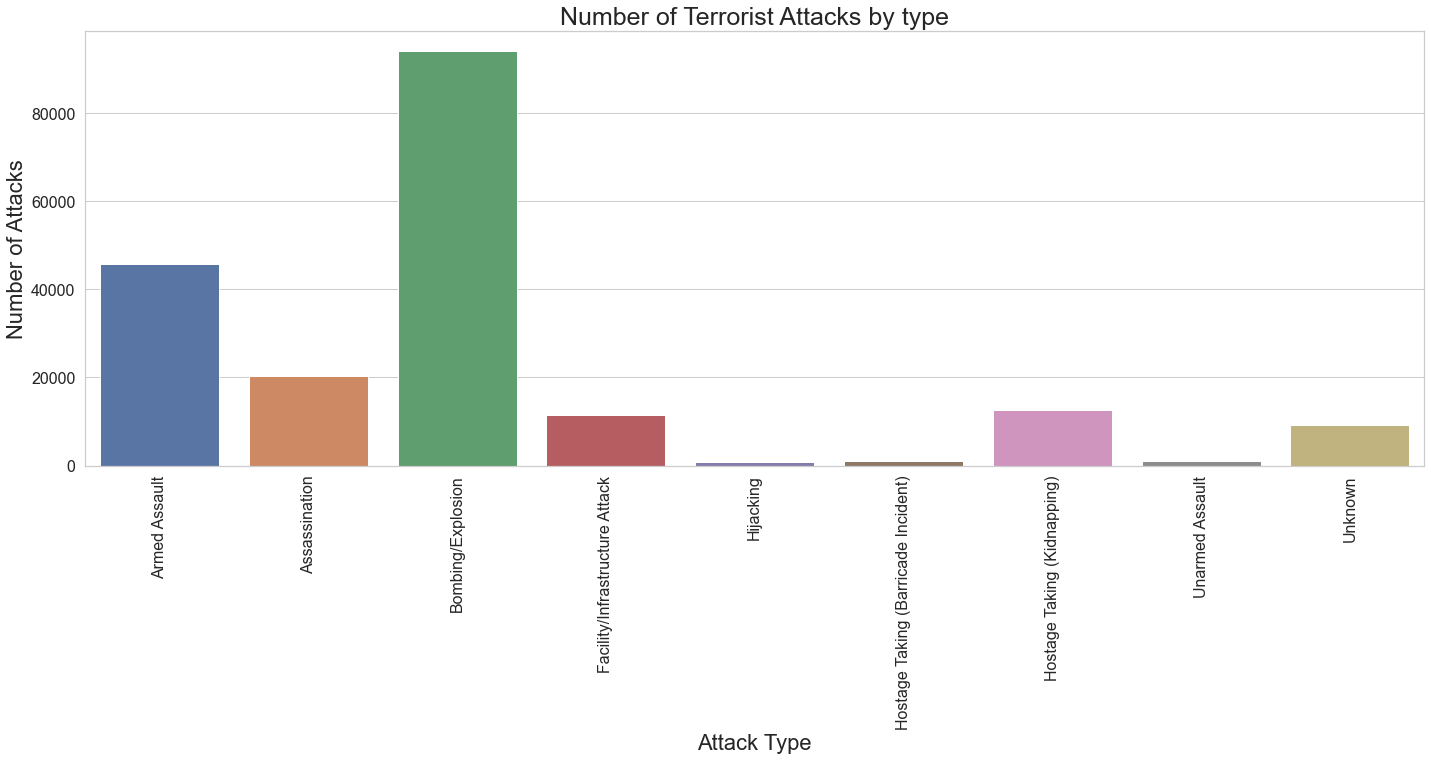

In [37]:
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype1_txt', y="Total_attacks", data=df_total_types_killed)
plt.title('Number of Terrorist Attacks by type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22) 
plt.ylabel('Number of Attacks', fontsize=22)

Text(0, 0.5, 'Number of people killed')

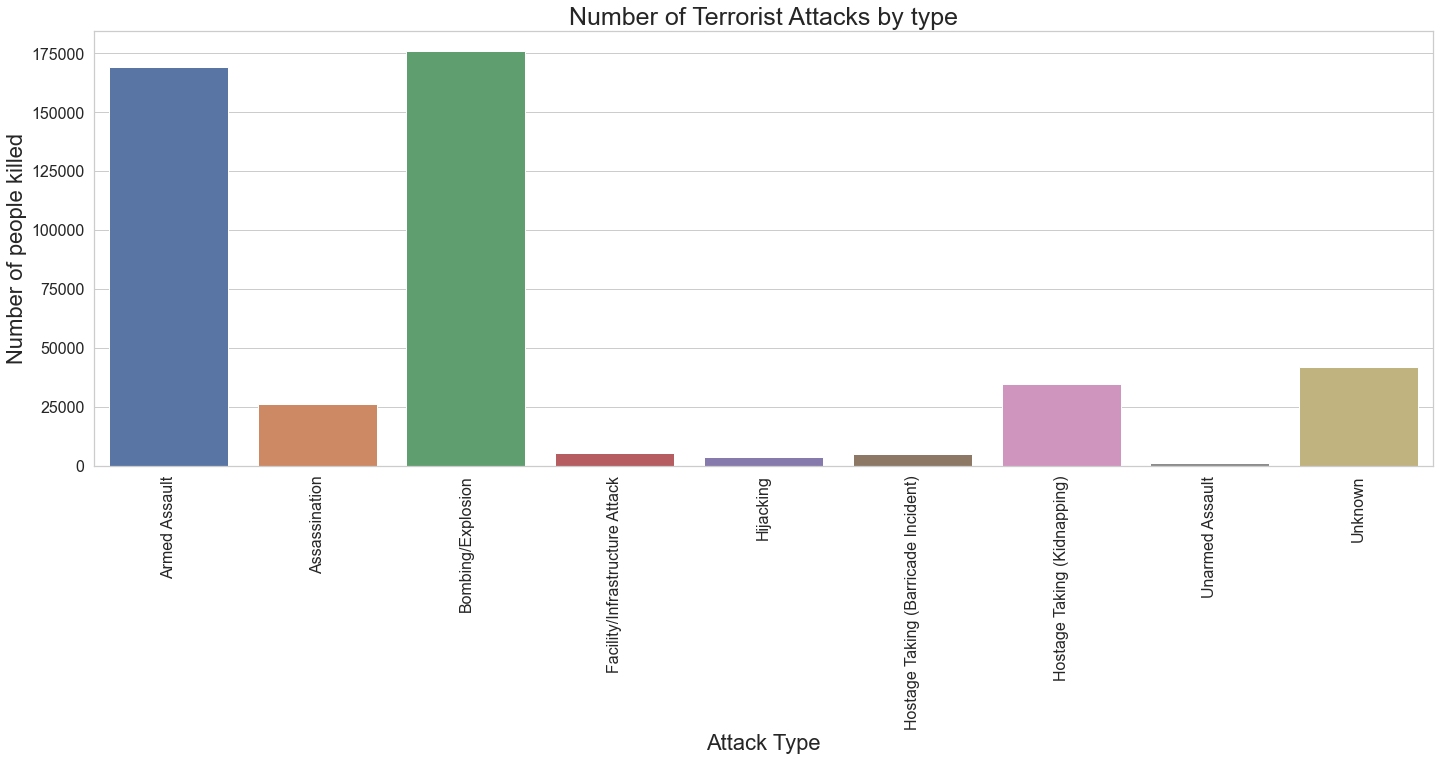

In [38]:
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype1_txt', y="Total_killed", data=df_total_types_killed)
plt.title('Number of Terrorist Attacks by type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22) 
plt.ylabel('Number of people killed', fontsize=22)

Text(0, 0.5, 'Number of people wound')

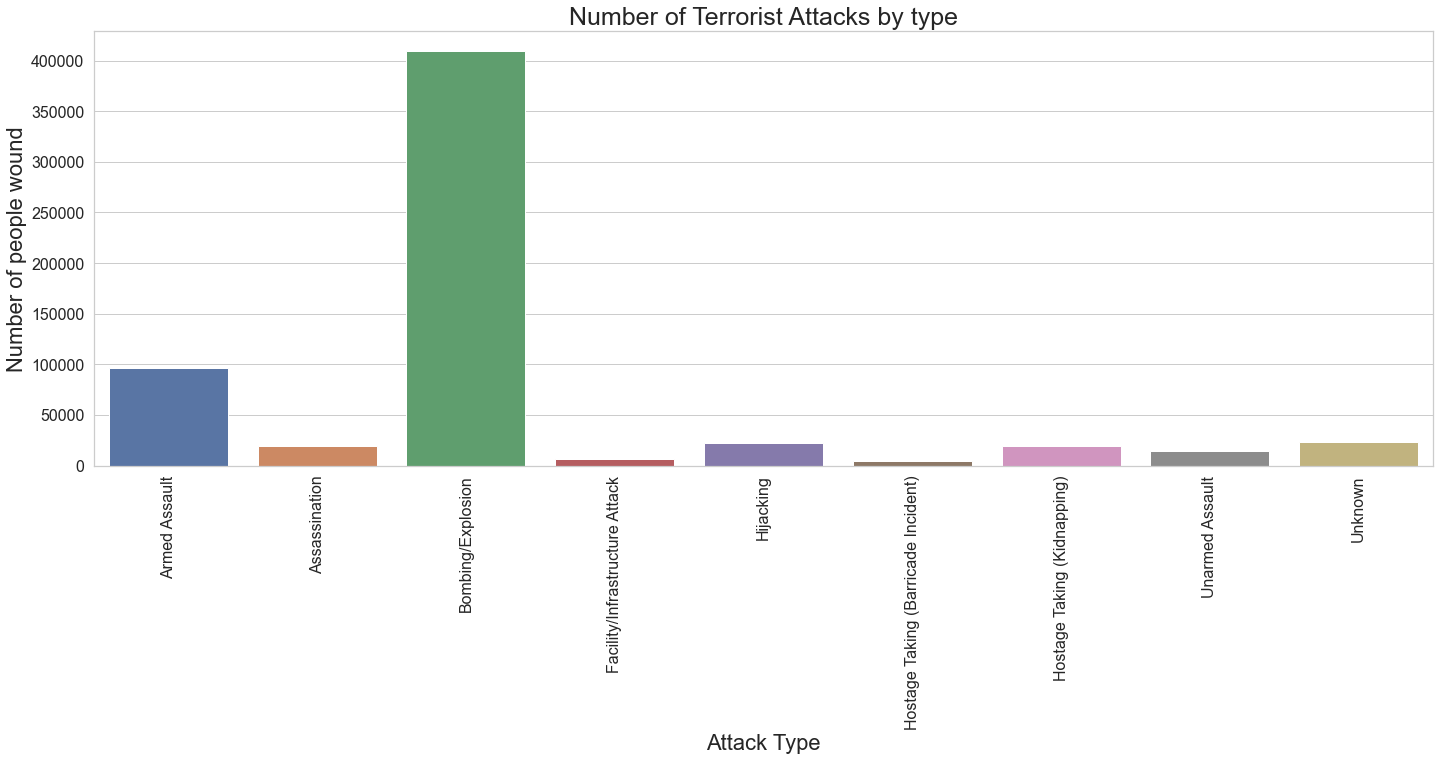

In [39]:
plt.figure(figsize=(24, 8))
sns.barplot(x='attacktype1_txt', y="Total_wound", data=df_total_types_killed)
plt.title('Number of Terrorist Attacks by type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Attack Type', fontsize=22) 
plt.ylabel('Number of people wound', fontsize=22)

In [40]:
df_total_types_killed_year = df.groupby(['iyear','attacktype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_killed_year

,iyear,attacktype1_txt,Total_attacks,Total_killed,Total_wound
0,1970,Armed Assault,61,56,77
1,1970,Assassination,21,17,24
2,1970,Bombing/Explosion,332,96,184
3,1970,Facility/Infrastructure Attack,174,27,60
4,1970,Hijacking,11,1,1
5,1970,Hostage Taking (Barricade Incident),3,0,0
6,1970,Hostage Taking (Kidnapping),33,18,12
7,1970,Unarmed Assault,3,0,5
8,1970,Unknown,5,3,2
9,1971,Armed Assault,43,28,38


Text(0, 0.5, 'Count')

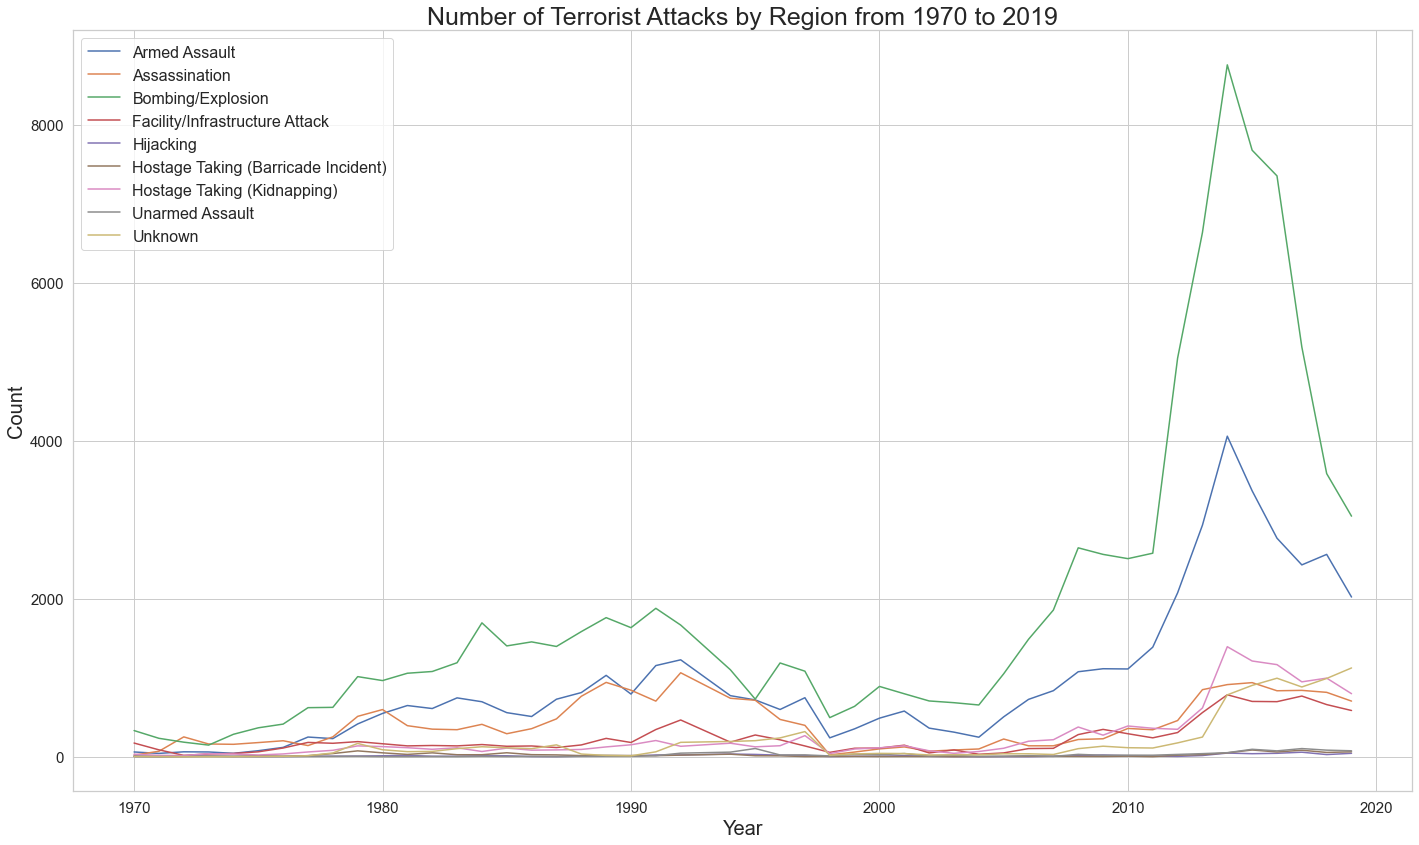

In [41]:
plt.figure(figsize=(24, 14))
sns.lineplot(data=df_total_types_killed_year, x='iyear', y='Total_attacks', hue='attacktype1_txt')

plt.title('Number of Terrorist Attacks by Region from 1970 to 2019', fontsize=25)
plt.legend(fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count', fontsize=20)


In [42]:
df_total_types_targeted = df.groupby(['targtype1_txt']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).reset_index()
df_total_types_targeted

,targtype1_txt,Total_attacks,Total_killed,Total_wound
0,Abortion Related,265,18,55
1,Airports & Aircraft,1362,3790,3910
2,Business,21408,27278,62508
3,Educational Institution,4604,4323,11362
4,Food or Water Supply,327,417,392
5,Government (Diplomatic),3677,3660,11592
6,Government (General),22697,30005,48166
7,Journalists & Media,3124,2065,2707
8,Maritime,348,1180,1021
9,Military,30887,118734,91888


Text(0, 0.5, 'Number of attacks')

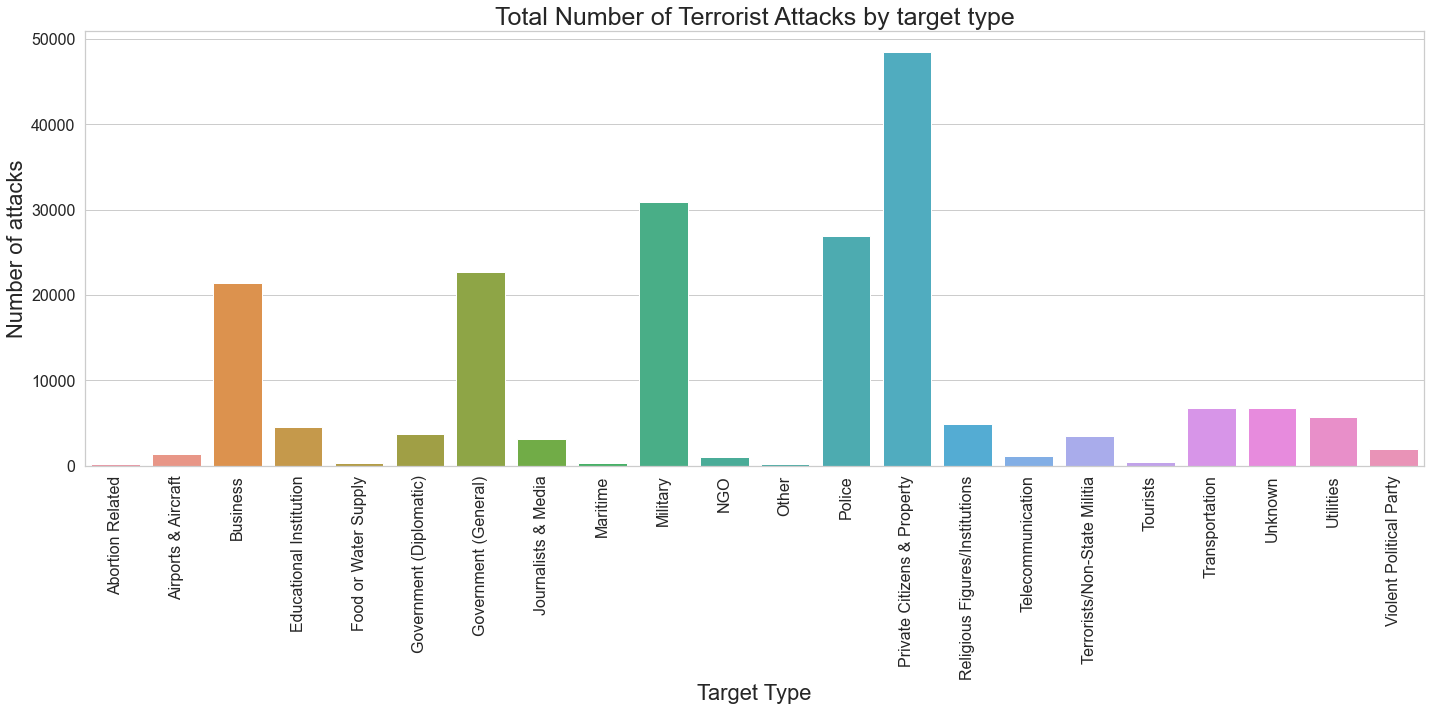

In [43]:
plt.figure(figsize=(24, 8))
sns.barplot(x='targtype1_txt', y="Total_attacks", data=df_total_types_targeted)
plt.title('Total Number of Terrorist Attacks by target type', fontsize=25)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Target Type', fontsize=22) 
plt.ylabel('Number of attacks', fontsize=22)

In [44]:
df_total_sucess_by_group = df.groupby(['gname']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).sort_values(by="Total_attacks", ascending=False).reset_index()
df_total_sucess_by_group.head(30)


,gname,Total_attacks,Total_killed,Total_wound
0,Unknown,87918,121629,229829
1,Taliban,10070,46085,41770
2,Islamic State of Iraq and the Levant (ISIL),6834,43617,37008
3,Shining Path (SL),4314,11103,4405
4,Al-Shabaab,4110,12984,12776
5,Boko Haram,3005,24173,13579
6,Farabundo Marti National Liberation Front (FMLN),2991,9016,5979
7,New People's Army (NPA),2980,3815,3640
8,Houthi extremists (Ansar Allah),2727,6623,8064
9,Irish Republican Army (IRA),2660,2090,6661


In [45]:
df_total_success = df.groupby(['success']).agg(Total_attacks=('nkill', 'count'),Total_killed=('nkill', 'sum'),Total_wound=('nwound', 'sum')).sort_values(by="Total_attacks", ascending=False).reset_index()
df_total_success.head(30)

,success,Total_attacks,Total_killed,Total_wound
0,1,173702,444645,599882
1,0,22853,17683,16647


Text(0, 0.5, 'Number of attacks')

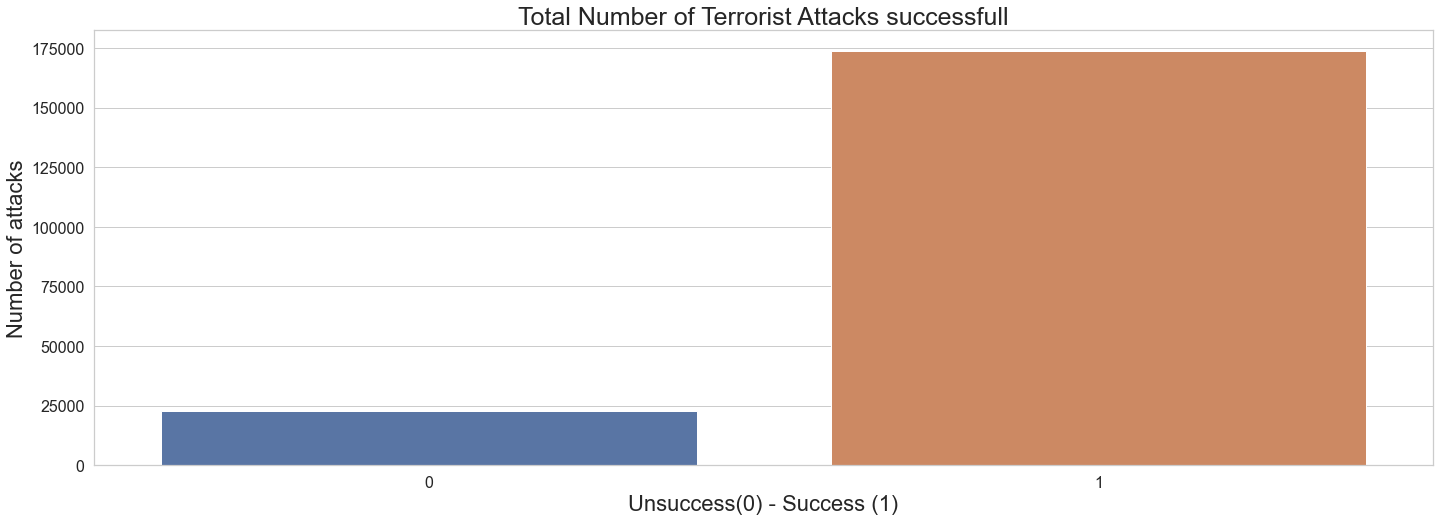

In [46]:
plt.figure(figsize=(24, 8))
sns.barplot(x='success', y="Total_attacks", data=df_total_success)
plt.title('Total Number of Terrorist Attacks successfull', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Unsuccess(0) - Success (1)", fontsize=22) 
plt.ylabel('Number of attacks', fontsize=22)

# ML: predicting variable Success

Our goal is to predict if a terrorist attack will be successful or not, for doing that we will use several types of classification algorithms like: Random Forest Classification, Decision Tree Classification, and choose the one that have the best accuracy in our app.

**Success Variable:** 
Success of a terrorist strike is defined according to the tangible effects of the attack.
Success is not judged in terms of the larger goals of the perpetrators. For example, a bomb that exploded in a building would be counted as a success even if it did not succeed in bringing the building down or inducing government repression.
The definition of a successful attack depends on the type of attack. Essentially, the key question is whether or not the attack type took place. If a case has multiple attack types, it is successful if any of the attack types are successful, with the exception of assassinations, which are only successful if the intended target is killed.

## Random Forest Classification

In [47]:
#Splitting the dataset into X and Y
dfnew = df[["iyear","imonth","iday", "success","attacktype1","targtype1","natlty1","weaptype1","nkill","country","region",
          "latitude","longitude","specificity","vicinity","extended","crit1","suicide"]]
dfnew=dfnew.dropna()
X = dfnew.drop(["success"], axis = 1, inplace = False)
X

,iyear,imonth,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,country,region,latitude,longitude,specificity,vicinity,extended,crit1,suicide
0,1970,7,2,1,14,58.0,13,1,58,2,18.456792,-69.951164,1.0,0,0,1,0
1,1970,3,8,6,7,21.0,13,0,130,1,19.371887,-99.086624,1.0,0,0,1,0
2,1970,1,8,1,10,217.0,13,1,160,5,15.478598,120.599741,4.0,0,0,1,0
3,1970,1,8,3,7,217.0,6,2,78,8,37.997490,23.762728,1.0,0,0,1,0
4,1970,1,8,7,7,217.0,8,2,101,4,33.580412,130.396361,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,2019,12,31,3,14,95.0,6,0,95,10,33.303567,44.371771,1.0,0,0,1,0
201179,2019,12,31,9,3,195.0,13,2,195,11,13.440886,22.441728,1.0,0,0,1,0
201180,2019,12,31,2,2,195.0,5,2,195,11,13.440886,22.441728,1.0,0,0,1,0
201181,2019,12,31,3,14,92.0,6,0,92,6,33.812790,74.097730,1.0,0,0,1,0


In [48]:
Y = dfnew['success']
Y

0         1
1         1
2         1
3         1
4         1
         ..
201178    1
201179    1
201180    1
201181    1
201182    1
Name: success, Length: 194750, dtype: int64

[0.11193079 0.09159969 0.11285708 0.06805167 0.12651186 0.03370737
 0.03401988 0.11956958 0.03310132 0.01845521 0.10487352 0.10592567
 0.0190587  0.00932819 0.00561024 0.0020284  0.00337083]


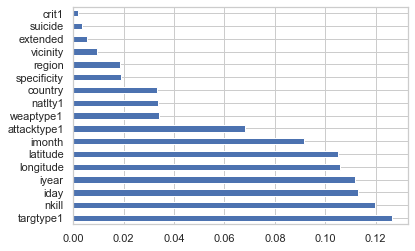

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

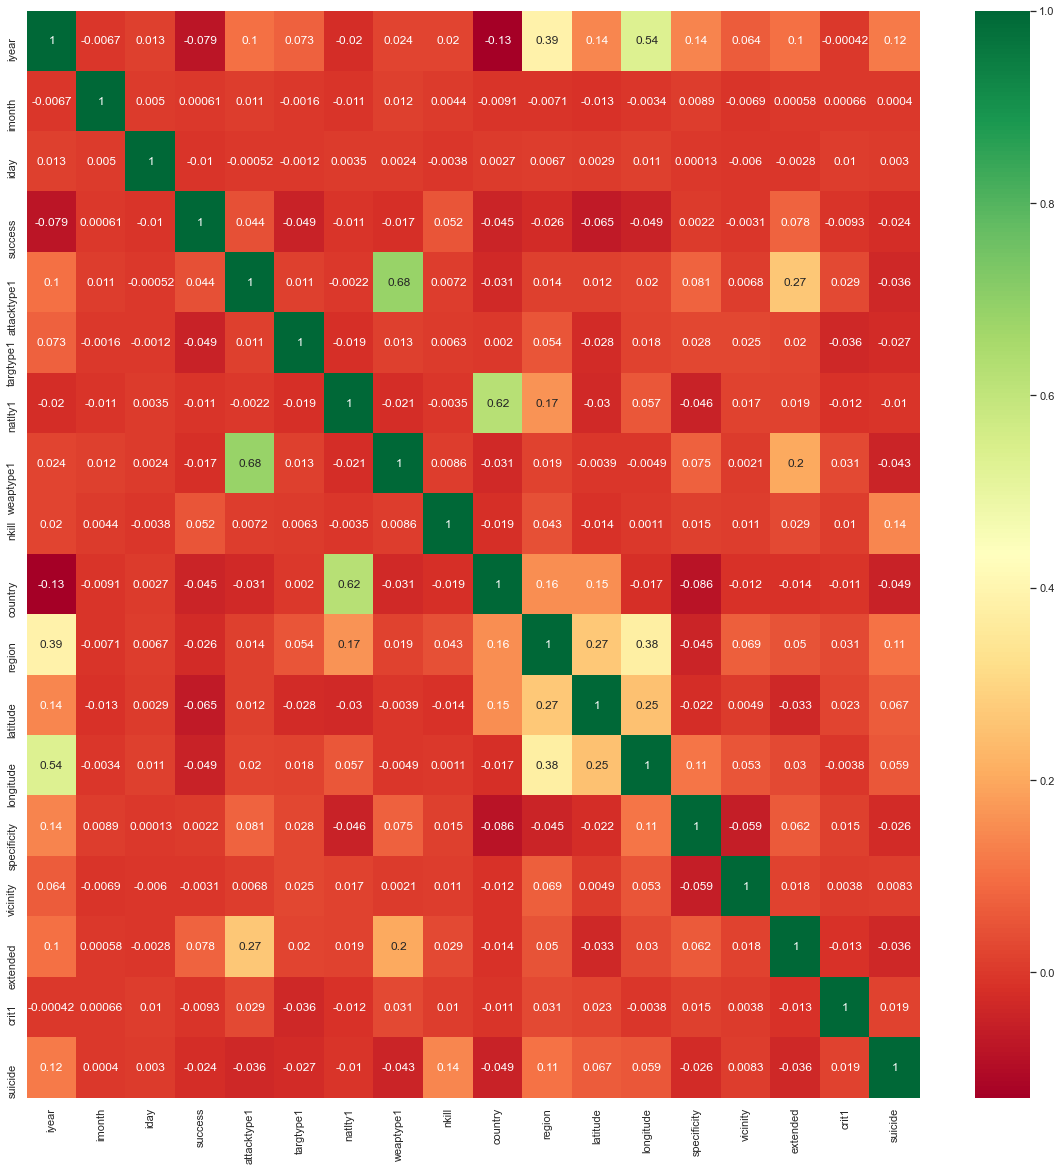

In [50]:
data = dfnew
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
#Splitting the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)


## Feature Scaling

In [52]:
# from sklearn.preprocessing import StandardScaler
# sc= StandardScaler()
# X_train.iloc[:,0:14] = sc.fit_transform(X_train.iloc[:,0:14])
# X_test.iloc[:,0:14] = sc.fit_transform(X_test.iloc[:,0:14])

## Training the Random Forest Clasificaton model on the Training Set

In [53]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [54]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
final_model_predictions = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred}).reset_index()
final_model_predictions= final_model_predictions.iloc[:,1:3]
final_model_predictions

,Actual,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
58420,1,1
58421,1,1
58422,1,1
58423,1,1


## Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 3523,  3097],
       [ 1382, 50423]], dtype=int64)

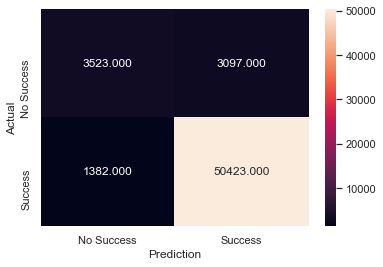

In [57]:
import matplotlib.pylab as plt
import seaborn as sn
from sklearn import tree , metrics, preprocessing

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.3f', xticklabels = ["No Success", "Success"] , yticklabels = ["No Success", "Success"] )
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

draw_cm( final_model_predictions.Actual, final_model_predictions.Predictions )   # correct 0 is sensitivity and correct is specificity

In [58]:
accuracy_score(y_test,y_pred)

0.9233376123234917

## Decision Tree Classification

### Training the Decision Tree Clasification model on the Training Set

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the Test set results

In [60]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
final_model_predictions = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred}).reset_index()
final_model_predictions= final_model_predictions.iloc[:,1:3]
final_model_predictions

,Actual,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
58420,1,1
58421,1,1
58422,1,1
58423,1,1


In [62]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[ 3736,  2884],
       [ 3256, 48549]], dtype=int64)

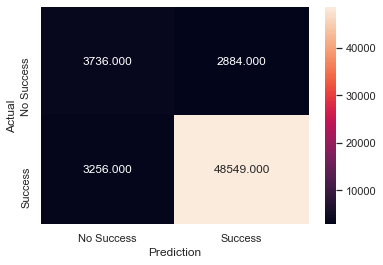

In [63]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.3f', xticklabels = ["No Success", "Success"] , yticklabels = ["No Success", "Success"] )
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

draw_cm( final_model_predictions.Actual, final_model_predictions.Predictions )   # correct 0 is sensitivity and correct is specificity

In [64]:
accuracy_score(y_test,y_pred)

0.894908001711596

## Conclusion

The Global terrorism is a very important problem, according to our analysis since 2014 the number of attacks have been increasing exponentially, being 2014 the most dangerous year,  with 16794 attacks, 46308 people killed, and 46496 people wound. 

From 2008 to 2019, the Total number of attacks was 95762, total number of people killed 223770 and the total number of people wound 301527, comparing this figures with the period from 1970 till 2007: the Total number of attacks was 81372, total number of people killed 191012 and total number of people wound 261399. This figures shows clearly the current situation with regards to global terrorism, being a problem that has been increased dramatically.

The Regios that currently havthe worst trends, are **Middle East & North Africa**, **South Asia** and **Sub-Saharan Africa.**
(To-Do)